# Statistical Analysis

In [9]:
from google.colab import files, drive
import zipfile
import shutil
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Activation, Flatten, MaxPooling2D, Conv2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from collections import Counter
import random
from matplotlib.backends.backend_pdf import PdfPages
import glob
import nbformat as nbf
from nbformat.v4 import new_markdown_cell, new_code_cell, new_output
import json
from scipy.stats import skew, kurtosis

In [2]:
drive.mount('/content/drive')

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/ML_Tensorflow/phytoplankton_labeled.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

data_dir = '/content/dataset/labeled_20201020'

base_dir = '/content/dataset'

Mounted at /content/drive


In [4]:
# Initialize variables to store statistics
total_samples = 0
class_counts = []

# Iterate over subdirectories
for subdir in os.listdir(data_dir):
    # Count number of samples in each class
    class_path = os.path.join(data_dir, subdir)
    num_samples = len(os.listdir(class_path))

    # Update total number of samples
    total_samples += num_samples

    # Store class count
    class_counts.append(num_samples)

# Convert class counts to numpy array for easier computation
class_counts = np.array(class_counts)

# Calculate mean, median, mode, standard deviation, min, and max
mean_samples_per_class = np.mean(class_counts)
median_samples_per_class = np.median(class_counts)
mode_samples_per_class = np.argmax(np.bincount(class_counts))
std_dev_samples_per_class = np.std(class_counts)
min_samples_per_class = np.min(class_counts)
max_samples_per_class = np.max(class_counts)

# Print statistics
print(f"Total number of samples: {total_samples}")
print(f"Total number of classes: {len(class_counts)}")
print(f"Mean number of samples per class: {mean_samples_per_class:.2f}")
print(f"Median number of samples per class: {median_samples_per_class}")
print(f"Mode number of samples per class: {mode_samples_per_class}")
print(f"Standard deviation of samples per class: {std_dev_samples_per_class:.2f}")
print(f"Minimum number of samples per class: {min_samples_per_class}")
print(f"Maximum number of samples per class: {max_samples_per_class}")

Total number of samples: 63074
Total number of classes: 50
Mean number of samples per class: 1261.48
Median number of samples per class: 269.5
Mode number of samples per class: 102
Standard deviation of samples per class: 2246.96
Minimum number of samples per class: 19
Maximum number of samples per class: 12280


In [5]:
data_dir = '/content/dataset/labeled_20201020'

# Initialize variables to store statistics
class_counts = []

# Iterate over subdirectories
for subdir in os.listdir(data_dir):
    # Count number of samples in each class
    class_path = os.path.join(data_dir, subdir)
    num_samples = len(os.listdir(class_path))

    # Store class count
    class_counts.append(num_samples)

# Convert class counts to numpy array for easier computation
class_counts = np.array(class_counts)

# Calculate skewness and kurtosis
skewness = skew(class_counts)
kurt = kurtosis(class_counts)

# Calculate quantiles
quantiles = np.percentile(class_counts, [25, 50, 75])

# Calculate interquartile range (IQR)
IQR = quantiles[2] - quantiles[0]

# Print the statistics
print(f"Skewness of class counts: {skewness:.2f}")
print(f"Kurtosis of class counts: {kurt:.2f}")
print(f"25th percentile: {quantiles[0]}")
print(f"50th percentile (median): {quantiles[1]}")
print(f"75th percentile: {quantiles[2]}")
print(f"Interquartile Range (IQR): {IQR}")


Skewness of class counts: 3.05
Kurtosis of class counts: 10.36
25th percentile: 106.25
50th percentile (median): 269.5
75th percentile: 1201.0
Interquartile Range (IQR): 1094.75


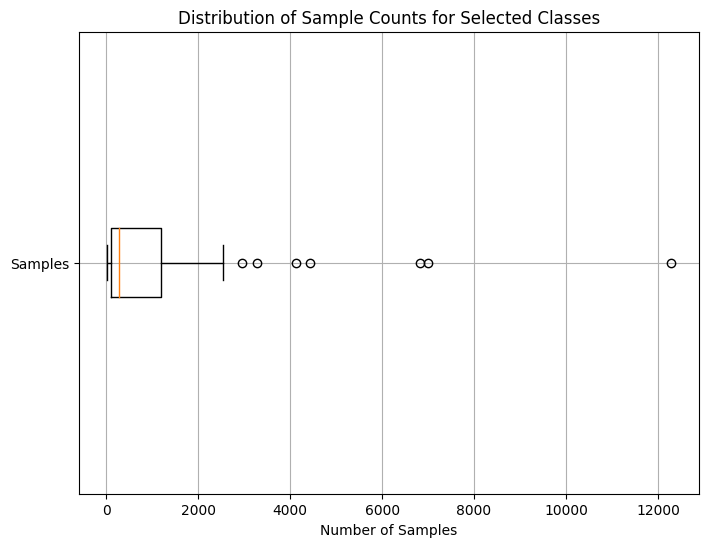

In [8]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(class_counts, vert=False)
plt.title('Distribution of Sample Counts for Selected Classes')
plt.xlabel('Number of Samples')
plt.yticks([1], ['Samples'])
plt.grid(True)
plt.show()